In [2]:
import pandas as pd
import matplotlib.pyplot as plt

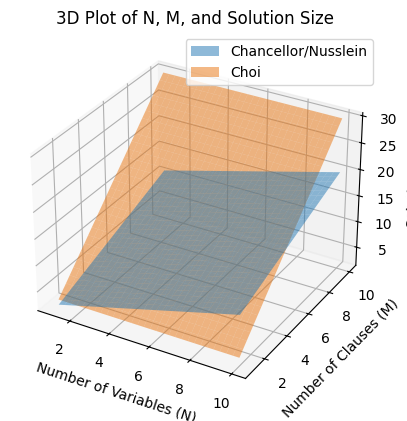

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Define the equation functions
def Chancellor(N, M):
    return N + M

def Choi(N, M):
    return 3 * M

# Create a meshgrid of N and M values
N = np.linspace(1, 10, 30)
M = np.linspace(1, 10, 30)
N, M = np.meshgrid(N, M)

# Evaluate the equations on the meshgrid
sol1 = Chancellor(N, M)
sol2 = Choi(N, M)

# Create a 3D figure
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot the equations
ax.plot_surface(N, M, sol1, label='Chancellor/Nusslein', alpha=0.5)
ax.plot_surface(N, M, sol2, label='Choi', alpha=0.5)

# Set labels and title
ax.set_xlabel('Number of Variables (N)')
ax.set_ylabel('Number of Clauses (M)')
ax.set_zlabel('Solution Size')
ax.set_title('3D Plot of N, M, and Solution Size')

# Add a legend
ax.legend()

# Show the plot
plt.show()

In [23]:
!python generate_cnf.py | /home/codespace/.cargo/bin/cargo run -- --log logs/sa/nuss23.csv --solver simulated-annealing

 --> crates/qubo_solvers/src/es.rs:6:5
  |
6 | use std::cmp::min_by_key;
  |     ^^^^^^^^^^^^^^^^^^^^
  |
  = note: `#[warn(unused_imports)]` on by default

   --> crates/qubo_solvers/src/momentum.rs:163:17
    |
163 |             let c_k = momentum_scaling_factor(k);
    |                 ^^^ help: if this is intentional, prefix it with an underscore: `_c_k`
    |
    = note: `#[warn(unused_variables)]` on by default

  --> crates/qubo_solvers/src/pes.rs:79:57
   |
79 |     fn solve(&mut self, qubo_problem: &QuboProblem, mut logger: Option<impl DataRecorder>) -> QuboSolution {
   |                                                         ^^^^^^ help: if this is intentional, prefix it with an underscore: `_logger`

  --> crates/qubo_solvers/src/pes.rs:79:53
   |
79 |     fn solve(&mut self, qubo_problem: &QuboProblem, mut logger: Option<impl DataRecorder>) -> QuboSolution {
   |                                                     ----^^^^^^
   |                                          

In [24]:
!REDUCTION=choi python generate_cnf.py | /home/codespace/.cargo/bin/cargo run -- --log logs/ma/nuss23.csv --solver momentum-annealing

 --> crates/qubo_solvers/src/es.rs:6:5
  |
6 | use std::cmp::min_by_key;
  |     ^^^^^^^^^^^^^^^^^^^^
  |
  = note: `#[warn(unused_imports)]` on by default

   --> crates/qubo_solvers/src/momentum.rs:163:17
    |
163 |             let c_k = momentum_scaling_factor(k);
    |                 ^^^ help: if this is intentional, prefix it with an underscore: `_c_k`
    |
    = note: `#[warn(unused_variables)]` on by default

  --> crates/qubo_solvers/src/pes.rs:79:57
   |
79 |     fn solve(&mut self, qubo_problem: &QuboProblem, mut logger: Option<impl DataRecorder>) -> QuboSolution {
   |                                                         ^^^^^^ help: if this is intentional, prefix it with an underscore: `_logger`

  --> crates/qubo_solvers/src/pes.rs:79:53
   |
79 |     fn solve(&mut self, qubo_problem: &QuboProblem, mut logger: Option<impl DataRecorder>) -> QuboSolution {
   |                                                     ----^^^^^^
   |                                          

In [25]:
!REDUCTION=choi python generate_cnf.py | /home/codespace/.cargo/bin/cargo run -- --log logs/energy_nuss23.csv --solver exhaustive-search

 --> crates/qubo_solvers/src/es.rs:6:5
  |
6 | use std::cmp::min_by_key;
  |     ^^^^^^^^^^^^^^^^^^^^
  |
  = note: `#[warn(unused_imports)]` on by default

   --> crates/qubo_solvers/src/momentum.rs:163:17
    |
163 |             let c_k = momentum_scaling_factor(k);
    |                 ^^^ help: if this is intentional, prefix it with an underscore: `_c_k`
    |
    = note: `#[warn(unused_variables)]` on by default

  --> crates/qubo_solvers/src/pes.rs:79:57
   |
79 |     fn solve(&mut self, qubo_problem: &QuboProblem, mut logger: Option<impl DataRecorder>) -> QuboSolution {
   |                                                         ^^^^^^ help: if this is intentional, prefix it with an underscore: `_logger`

  --> crates/qubo_solvers/src/pes.rs:79:53
   |
79 |     fn solve(&mut self, qubo_problem: &QuboProblem, mut logger: Option<impl DataRecorder>) -> QuboSolution {
   |                                                     ----^^^^^^
   |                                          

SAT


In [11]:
ger = "nuss"

df_sa = pd.read_csv(f"logs/sa/{ger}.csv")
df_sa["model"] = "SA"
df_ma = pd.read_csv(f"logs/ma/{ger}.csv")
df_ma["model"] = "MA"

df = pd.concat((df_ma, df_sa))

<Axes: title={'center': 'Energy landscape Across Solvers'}, xlabel='Iteration Number', ylabel='Energy'>

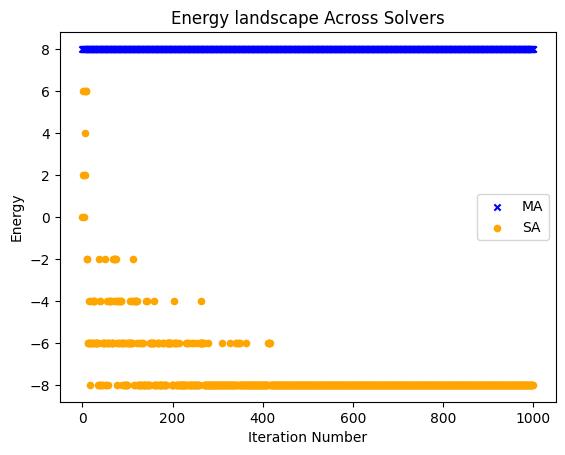

In [12]:
df[df["model"] == "MA"].plot(kind="scatter", marker="x", c = "blue", x = "iteration_stamp", y = "energy", label="MA", title="Energy landscape Across Solvers", ylabel="Energy", xlabel="Iteration Number", ax=plt.gca())
df[df["model"] == "SA"].plot(kind="scatter", marker="o", c = "orange", x = "iteration_stamp", y = "energy", label="SA", title="Energy landscape Across Solvers", ylabel="Energy", xlabel="Iteration Number", ax=plt.gca())

<Axes: title={'center': 'Energy landscape Across Solvers'}, xlabel='Time (ns)', ylabel='Energy'>

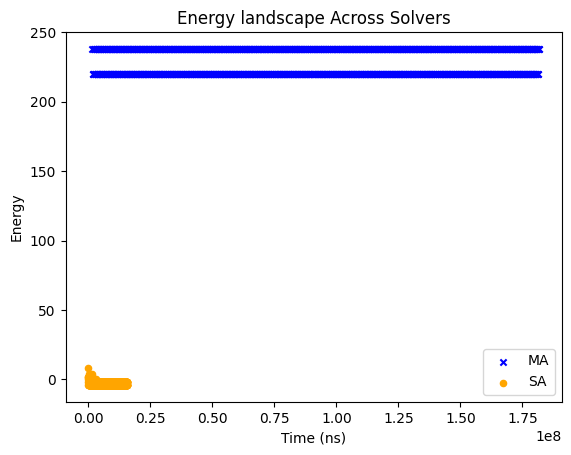

In [ ]:
df[df["model"] == "MA"].plot(kind="scatter", marker="x", c = "blue", x = "time_stamp", y = "energy", label="MA", title="Energy landscape Across Solvers", ylabel="Energy", xlabel="Time (ns)", ax=plt.gca())
df[df["model"] == "SA"].plot(kind="scatter", marker="o", c = "orange", x = "time_stamp", y = "energy", label="SA", title="Energy landscape Across Solvers", ylabel="Energy", xlabel="Time (ns)", ax=plt.gca())

In [13]:
df_chancellor = pd.read_csv("logs/energy_chancellor.csv", dtype={"solution": str, "value": float})
df_chancellor["Reduction"] = "CHANCELLOR"
df_choi = pd.read_csv("logs/energy_choi.csv", dtype={"solution": str, "value": float})
df_choi["Reduction"] = "CHOI"
df_n = pd.read_csv("logs/energy_nuss.csv", dtype={"solution": str, "value": float})
df_n["Reduction"] = "NUSSLEIN"
df_n23 = pd.read_csv("logs/energy_nuss23.csv", dtype={"solution": str, "value": float})
df_n23["Reduction"] = "NUSSLEIN23"

df_solution_spaces = pd.concat((df_chancellor, df_choi, df_n, df_n23))

df_solution_spaces

,solution,value,Reduction,value
0,00000000000000000000,0.0,CHANCELLOR,NaN
1,10000000000000000000,-176.0,CHANCELLOR,NaN
2,01000000000000000000,-160.0,CHANCELLOR,NaN
3,11000000000000000000,-336.0,CHANCELLOR,NaN
4,00100000000000000000,-224.0,CHANCELLOR,NaN
...,...,...,...,...
1048571,11011111111111111111,6.0,NUSSLEIN23,NaN
1048572,00111111111111111111,6.0,NUSSLEIN23,NaN
1048573,10111111111111111111,6.0,NUSSLEIN23,NaN
1048574,01111111111111111111,10.0,NUSSLEIN23,NaN


Text(0.5, 1.0, 'Energy landscape')

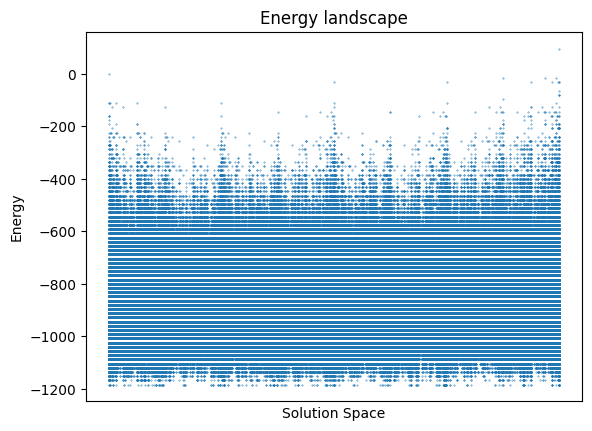

In [6]:
plt.scatter(x = df_chancellor.index.values,y = df_chancellor["value"], s=0.1)
plt.ylabel("Energy")
plt.xlabel("Solution Space")
plt.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)
plt.title("Energy landscape")

In [7]:
plt.scatter(x = df_choi.index.values,y = df_choi["value"], s=0.1)
plt.ylabel("Energy")
plt.xlabel("Solution Space")
plt.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)
plt.title("Energy landscape")

KeyError: 'value'

Text(0.5, 1.0, 'Energy landscape')

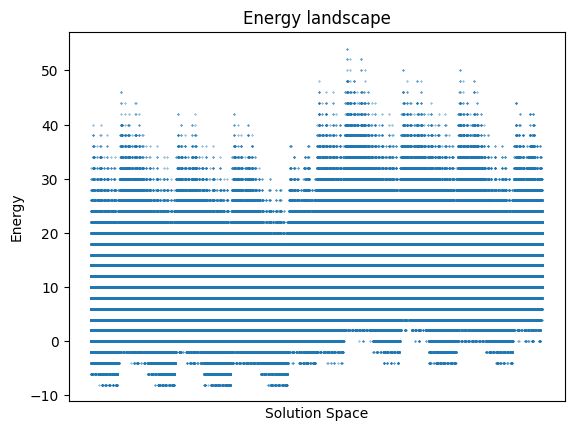

In [9]:
plt.scatter(x = df_n.index.values,y = df_n["value"], s=0.1)
plt.ylabel("Energy")
plt.xlabel("Solution Space")
plt.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)
plt.title("Energy landscape")

Text(0.5, 1.0, 'Energy landscape')

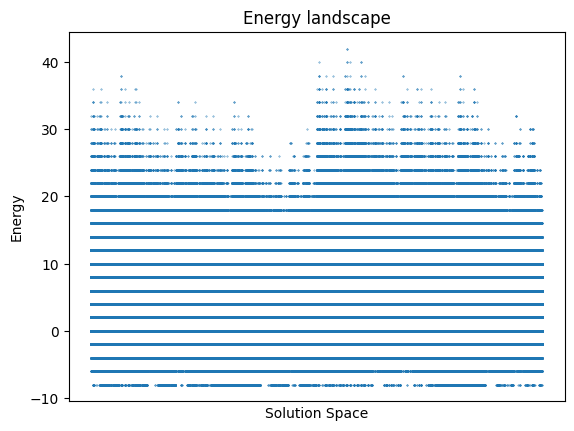

In [10]:
plt.scatter(x = df_n23.index.values,y = df_n23["value"], s=0.1)
plt.ylabel("Energy")
plt.xlabel("Solution Space")
plt.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)
plt.title("Energy landscape")

Fitness Distance Correlation Coefficient (FDCC): 0.1099


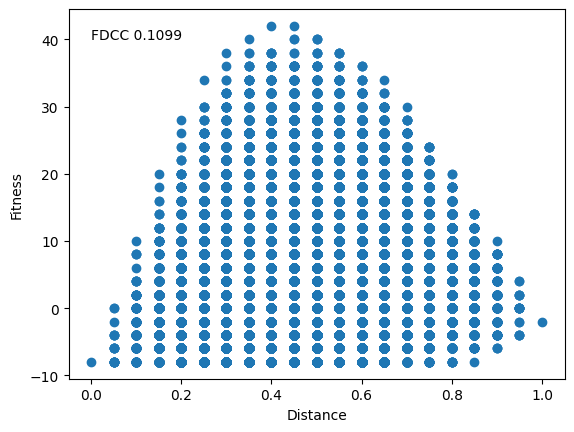

In [23]:
import numpy as np

# Read the CSV file
data = df_n23

# Convert binary strings to integer arrays
solutions = data['solution'].map(lambda x: np.array([int(bit) for bit in x]))

# Calculate the configurational energy for each solution
energies = data['value']


import pandas as pd
import numpy as np
from scipy.spatial.distance import hamming

min_energy_idx = energies.idxmin()
# Read the CSV fil

# Define the reference solution (adjust as needed)
reference_solution = solutions.iloc[min_energy_idx]

# Calculate the Hamming distance from the reference solution
distances = solutions.apply(lambda soln: hamming(soln, reference_solution))

# Calculate the FDCC
fdcc_numerator = sum((distances - distances.mean()) * (energies - energies.mean()))
fdcc_denominator = np.sqrt(sum((distances - distances.mean())**2) * sum((energies - energies.mean())**2))
fdcc = fdcc_numerator / fdcc_denominator

print(f"Fitness Distance Correlation Coefficient (FDCC): {fdcc:.4f}")

plt.scatter(x=distances, y=energies)
plt.ylabel("Fitness")
plt.xlabel("Distance")
plt.text(0,40,f"FDCC {fdcc:.4f}")
plt.show()